# Teoretický základ
## Pravá strana s polynómom a exponenciálnou funkciou
Ak pravá strana je
$$ f(t) = e^{\alpha t} P_m(t),
\mbox{ kde } P_m\ \mbox{ je polynóm stupňa } m,$$
<p/>
partikulárne riešenie $y_p(t)$ hľadáme v tvare <p/>
$$y_{p}(t) = e^{\alpha t} R_m(t)\, t^k\ \mbox{ kde } \ R_m(t) 
\ \mbox{ je polynóm stupňa } m,$$
<p/>
** $k$ je násobnosť čísla $\alpha$ ako koreňa charakteristickej rovnice. **
<p/>


## Pravá strana najkomplikovanejšia, sinusy a kosinusy
Ak pravá strana je
$$ f(t) = e^{\alpha t}\left({ P_m(t) \cos \beta t + Q_n(t) \sin \beta t}\right),
\mbox{ kde } P_m, Q_n \mbox{ sú polynómy stupňov } m \mbox{ a } n,$$
zoberieme inú pravú stranu, v komplexnom tvare:<p/>
$$ \tilde{f}(t) = e^{(\alpha + i \beta) t} (P_m(t) - i Q_n(t))\ 
\mbox{ (je to predchádzajúci prípad). }$$<p/>
Presvedčte sa o tom, že __pôvodná pravá strana je reálnou časťou tej zmenenej komplexnej.__<br/>
Partikulárne riešenie $\tilde{y}_p(t)$ rovnice so zmenenou pravou stranou $\tilde{f}(t)$ hľadáme v tvare <p/>
$$ \tilde{y}_{p}(t) = e^{(\alpha + i \beta) t} R_s(t)\, t^k\ \mbox{ kde } \ R_s(t) 
\ \mbox{ je polynóm stupňa } \ s = \max(n,m),$$
<p/>
** $k$ je násobnosť čísla $\alpha + i \beta$ ako koreňa charakteristickej rovnice. **
<p/>
Partikulárne riešenie $y_p(t)$ rovnice s pôvodnou  pravou stranou $f(t)$ nájdeme ako __reálnu časť riešenia $\tilde{y}_{p}(t) $.__

In [1]:
# Túto bunku treba vždy vykonať najskôr, cez Ctrl-Enter a potom podobne tie dole

from sympy import var, init_printing, latex, diff, sin, cos, exp, Function, I, roots
from sympy import expand, collect, solve, factor, symbols
from neurcite import formulacia, riesenie, skuska, nas_kor, vypis_kor, polycoeffs
from IPython.display import HTML
init_printing()
t=var('t',real=True)
y=Function('y')

## Vzorový príklad, pravá strana s polynómom a exponenciálou
Riešme rovnicu $\ a_2 y'' + a_1 y' + a_0  y = e^{\alpha t} P_m(t).$
<p/>
Môžeme meniť koeficienty rovnice (čísla $a_2, a_1, a_0$) a aj pravú stranu 
teda číslo $\alpha$ a koeficienty polynómu $P_m$. <br/>
Funguje to aj v prípade $k>0$, tj. keď $\alpha$ je medzi koreňmi charakteristickej rovnice.

In [2]:
a2,a1,a0 = 1,4,5
al = -2
Pmc = [1,-1,-4,3]      # len toto treba zadat, ostatne sa dopocita
m = len(Pmc)           # pocet koeficientov
Pm = sum([Pmc[m-1-i]*t**i for i in range(m)])
f = exp(al*t)*Pm
f # vypis pravej strany

In [3]:
# vypocet k a korenov char.rovnice
drc = [a2,a1,a0]
k = nas_kor(al, drc)
kor = vypis_kor(drc)

Máme $k = $ {{ HTML(latex(k)) }}, pretože korene char. rovnice sú {{ HTML(kor) }} a 
$\alpha = $ {{ HTML(latex(al)) }}. 
<br/>Preto tvar partikulárneho riesenia je:

In [4]:
Rc = list(symbols("r:%d" %m))
yp = (t**k)*exp(al*t)*sum([Rc[i]*t**i for i in range(m)])
yp

Chceme teda riešiť rovnicu {{ HTML(formulacia(drc,al,Pmc)) }}
Dosadíme $y_p$ do ľavej strany a vypíšeme si, čo vznikne:

In [5]:
LS = a2*diff(yp,t,2) + a1*diff(yp,t) + a0*yp
LS

Necháme roznásobiť (expand), potom dáme spolu (collect) výrazy s rovnakými mocninami $t$.<br/> Pokrátime exponenciálou, dostaneme len polynóm. Skontrolujte ručne!

In [6]:
mocniny = [t**i for i in range(1,m)]
LS = expand(LS/exp(al*t))
LS = collect(LS,mocniny)
LS

Zistime koeficienty pri mocninách $t$ na ľavej strane a porovnáme s koeficientami pravej strany.

In [7]:
c_lava = [LS.subs(t,0)] + [LS.coeff(ti) for ti in mocniny] 
c_prava = Pmc[::-1]   # teraz od najnizej mocniny treba
c_lava,c_prava

In [8]:
rov = [0]*m
for i in range(m):
   rov[i] = r"$%s = %s$" %(latex(c_lava[i]),latex(c_prava[i]))
rowstr = '<br/>'.join(rov)

Dostávame takéto rovnice:

{{ HTML(rowstr) }}

Vyriešime ich cez funkciu ```solve``` ktorej sa podhodí zoznam rovníc (v tvare, že niečo sa rovná nule) a zoznam premenných, podľa ktorých to chceme riešiť.

In [9]:
r_vypoc = solve([c_lava[i] - c_prava[i] for i in range(m)],Rc)
r_vypoc

Teraz za každý koeficient dosadíme jeho vypočítanú hodnotu (funkcia ```subs```) a vypíšeme $y_p$.
Výpočet u konca.

In [10]:
for ra in r_vypoc:
    yp = yp.subs(ra,r_vypoc[ra])
yp    

Patrilo by sa skúšku urobiť, takže tak:

In [11]:
LS = skuska(drc,yp)
LS

In [12]:
# Či ľavá a pravá strana sa rovnajú; ak True, je to správne
LS == f

True

## Vzorový príklad, pravá strana so sinusmi a kosinusmi
Riešme rovnicu $\ a_2 y'' + a_1 y' + a_0  y = k_1 \cos \omega t + k_2 \sin \omega t.$
<p/>
Môžeme meniť koeficienty rovnice (čísla $a_2, a_1, a_0$) a aj pravej strany 
(čísla $\omega, k_1, k_2$).  

In [13]:
a2,a1,a0 = 1,0,4
omega = 2
k1,k2 = -3,2
f = k1*cos(omega*t) + k2*sin(omega*t)
f   # vypis pravej strany

## 1. Riešenie metódou neurčitých koeficientov,  bez prechodu ku komplexnej pravej strane
Tvar partikulárneho riešenia $y_p$:

In [14]:
a,b = var("a b")
k = 1             # prečo?
yp = (t**k)*(a*cos(omega*t) + b*sin(omega*t))

Zrozumiteľne napísané, chceme riešiť rovnicu {{ HTML(formulacia([a2,a1,a0],0,[k1],2,[k2])) }}<p/>
Dosadíme $y_p$ do ľavej strany a vypíšeme si, čo vznikne:

In [15]:
LS = a2*diff(yp,t,2) + a1*diff(yp,t) + a0*yp
LS

Necháme roznásobiť (```expand```), potom dáme spolu (```collect```) výrazy so $\sin \omega t$ a $\cos \omega t$. Skontrolujte ručne!

In [16]:
LS = expand(LS) 
LS = collect(LS,[cos(omega*t),sin(omega*t)])
LS

Zistíme koeficienty pri $\cos \omega t, \sin \omega t$ na ľavej i pravej strane

In [17]:
csl, ssl = LS.coeff(sin(omega*t)),LS.coeff(cos(omega*t))
# Podobne s pravou stranou
PS = collect(f,[sin(omega*t),cos(omega*t)])
csp, ssp = PS.coeff(sin(omega*t)),PS.coeff(cos(omega*t))

rovnica1 = r"$%s = %s$" %(latex(csl),latex(csp))
rovnica2 = r"$%s = %s$" %(latex(ssl),latex(ssp))

Porovnaním koeficientov pri rovnakých výrazoch dostaneme rovnice: <br/>
Porovnanie koeficientov pri $\sin t$ na ľavej a pravej strane: {{ rovnica1 }}
<br/>
Porovnanie koeficientov pri $\cos t$ na ľavej a pravej strane: {{ rovnica2 }}
<p/>
Vyriešime sústavu, že koeficienty pri rovnakých výrazoch na pravej a ľavej strane sa musia rovnať.

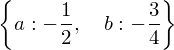

In [18]:
# mocniny t v rieseni !!!
S = solve([csl-csp,ssl-ssp],[a,b])

# to dole je vsetko len kvoli krajsiemu vypisu
a_v,b_v= S[a],S[b]
a_vysl,b_vysl = latex(S[a]), latex(S[b])
omstr = latex(omega)
tk = "" if k==0 else "t^%d\left(" %k
tkend = "" if k == 0 else "\right)"
vypis = r"Koeficienty: $\displaystyle{a = %s,\ b= %s}.$<p/>\
Výsledok: $\ y_p=\displaystyle{%s %s \cos %s t  %s \sin %s t %s}.$" %(a_vysl,b_vysl,tk,a_vysl,omstr,b_vysl,omstr,tkend)
S

{{ vypis }}
<p/>
Treba urobiť skúšku, či je to správne riešenie.

In [19]:
yp = a_v*t*cos(omega*t) + b_v*t*sin(omega*t)
LS = a2*diff(yp,t,2) + a1*diff(yp,t) + a0*yp

In [20]:
pravda = (LS.simplify() == f)
prastr = "Nie je " if not pravda else "Je "
Skuska = prastr + "to správne riešenie."
LS,f

{{ Skuska }}

## 2. Riešenie metódou neurčitých koeficientov, prechod ku komplexnej pravej strane

In [21]:
a2,a1,a0 = 1,0,4
al = 0  # cislo alfa v exponenciale
be = 2  # cislo v sinusoch a kosinusoch
A = al + I*be
Pm,Qn = -3,2
f = exp(al*t)*(Pm*cos(be*t) + Qn*sin(be*t))
f   # vypis pravej strany

Zmenená pravá strana $\tilde{f}$ v komplexnom tvare bude

In [22]:
fv = exp(A*t)*(Pm -I*Qn)
fv

Číslo k (násobnosť čísla α ako koreňa char. rovnice) urobí funkcia ```nas_kor``` a korene vypíšeme cez ```vypis_kor```

In [23]:
drc = [a2,a1,a0]
k = nas_kor(al + I*be, drc)
kor = vypis_kor(drc)

Máme $k = $ {{ HTML(latex(k)) }}, pretože korene char. rovnice sú {{ HTML(kor) }} a 
$\alpha + i \beta = $ {{ HTML(latex(al + I*be)) }}. 
<br/>Preto tvar partikulárneho riesenia je:

In [24]:
r0 = var('r0')
ypv = (t**k)*r0*exp(A*t)
ypv

Potrebujeme určiť neznámy (komplexný) koeficient $r_0$. Urobíme preto prvú a druhú deriváciu $y_p$ a dosadíme do pôvodnej rovnice. Vypíšeme, čo sme dostali na ľavej strane  a aj zmenenú pravú stranu $\tilde{f}$.

In [25]:
LS = a2*diff(ypv,t,2) + a1*diff(ypv,t) +a0*ypv
LS, fv

In [26]:
c_t0, c_t1 = LS.subs(t,0),expand(LS).coeff(t*exp(A*t))
# Podobne s pravou stranou

c_t0p, c_t1p = fv.subs(t,0),fv.coeff(t*exp(A*t))

rovnica1 = r"$%s = %s$" %(latex(c_t0),latex(c_t0p))
rovnica2 = r"$%s = %s$" %(latex(c_t1),latex(c_t1p))

Porovnaním koeficientov pri rovnakých výrazoch dostaneme rovnice: <br/>
Koeficienty pri abs. člene ($t^0$) na ľavej a pravej strane: {{ rovnica1 }}
<br/>
Koeficienty pri $t^1$ na ľavej a pravej strane: {{ rovnica2 }}
<p/>
Máme teda jedinú rovnicu, hravo ju vyriešime.<br/>
Vyskúšajte, čo by sa stalo, keby ste hore mylne určili $k=0$.

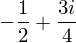

In [27]:
r0_vysl, = solve(c_t0-c_t0p,r0)
r0_vysl

Riešenie $\tilde{y_p}$ pre zmenenú (komplexnú) pravú stranu $\tilde{f}$ teda bude (dosadíme vypočítané $r_0$):

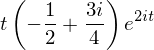

In [28]:
ypv = ypv.subs(r0,r0_vysl)
ypv

Riešenie $y_p$ pre pôvodnú pravú stranu $f$ bude reálnou časťou riešenia $\tilde{y_p}$.
Urobte tú reálnu časť aj ručne!

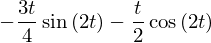

In [29]:
yp, nieco = ypv.as_real_imag()
yp

In [30]:
LS = skuska(drc,yp)
vyslo = (LS == f)     # ci lava strana sa rovna pravej
LS

In [31]:
vyslo

True